First we need a dataset to train on. Let's create a DataSet object directly from huggingface. The avaialable datasets are [here](https://huggingface.co/datasets/fastmachinelearning/collide-1m/tree/main). We want to train on QCD so let's use the "QCD inclusive" dataset which on hugging face is called: QCD_HT50toInf. We set the max_number_of_events to -1 to get all the data but this can be set to whatever is needed

In [1]:
from data.dataset import DataSet

/opt/conda/envs/tagger/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2026-02-06 12:53:10.725290: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-06 12:53:10.774945: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-06 12:53:12.384492: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may 

In [2]:
QCD_data_set = DataSet.fromHF('QCD_HT50toInf',max_number_of_events=-1)
QCD_data_set.save_h5('dataset/QCD')

cpu count: 24
Add multiplicities
Pad Jets
Pad Objects
Process other columns
       FullReco_GenMissingET_MET  L1T_PUPPIMET_MET  L1T_PUPPIMET_Phi  \
count              799884.000000     799884.000000     799884.000000   
mean                    0.919171         27.683849         -0.001507   
std                     4.105609         26.306128          1.809750   
min                     0.000000          0.000000         -3.140625   
25%                     0.000000         12.843750         -1.565430   
50%                     0.000000         21.625000          0.000000   
75%                     0.335693         34.312500          1.563477   
max                   334.250000       1026.000000          3.140625   

       L1T_PUPPIMET_Eta  jet_multiplicity  muon_multiplicity  \
count     799884.000000     799884.000000       799884.00000   
mean          -0.004704          1.841798            0.04618   
std            2.601617          1.377498            0.21770   
min           -8.86

In [3]:
QCD_data_set.pretty_name = "QCD Inclusive"
QCD_data_set.plot_inputs('dataset/QCD')

plot jet features
plot object features
plot met features
plot gen features
plot multiplicity features


<Figure size 640x480 with 0 Axes>

Let's also get the diHiggs -> 4b dataset to be our testing "anomaly" and the minbias to be our "background"

In [4]:
minbias_data_set = DataSet.fromHF('minbias',max_number_of_events=-1)
minbias_data_set.pretty_name = "minimum bias"
minbias_data_set.save_h5('dataset/minbias')
minbias_data_set.plot_inputs('dataset/minbias')


cpu count: 24
Add multiplicities
Pad Jets
Pad Objects
Process other columns
       FullReco_GenMissingET_MET  L1T_PUPPIMET_MET  L1T_PUPPIMET_Phi  \
count             1000000.000000    1000000.000000    1000000.000000   
mean                    0.060143          6.829660         -0.004615   
std                     0.351896          9.358663          1.371867   
min                     0.000000          0.000000         -3.140625   
25%                     0.000000          0.000000         -0.408203   
50%                     0.000000          2.916016          0.000000   
75%                     0.000000         10.765625          0.383057   
max                    24.859375        219.500000          3.140625   

       L1T_PUPPIMET_Eta  jet_multiplicity  muon_multiplicity  \
count    1000000.000000    1000000.000000     1000000.000000   
mean           0.012181          0.164354           0.029348   
std            1.775172          0.426757           0.172860   
min           -9.40

<Figure size 640x480 with 0 Axes>

In [5]:

hhbbbb_data_set = DataSet.fromHF('HH_4b',max_number_of_events=-1)
hhbbbb_data_set.pretty_name = "HH -> bbbb"
hhbbbb_data_set.save_h5('dataset/hhbbbb')
hhbbbb_data_set.plot_inputs('dataset/hhbbbb')

cpu count: 24
Add multiplicities
Pad Jets
Pad Objects
Process other columns
       FullReco_GenMissingET_MET  L1T_PUPPIMET_MET  L1T_PUPPIMET_Phi  \
count               19984.000000      19984.000000      19984.000000   
mean                   16.224879         56.476293          0.015636   
std                    21.154812         50.527088          1.820133   
min                     0.000000          0.155273         -3.140625   
25%                     3.312500         26.968750         -1.578125   
50%                     9.710938         44.187500          0.040009   
75%                    21.328125         69.875000          1.599609   
max                   400.250000       1120.000000          3.140625   

       L1T_PUPPIMET_Eta  jet_multiplicity  muon_multiplicity  \
count      19984.000000      19984.000000       19984.000000   
mean          -0.011880          4.612940           0.407476   
std            2.886597          1.644614           0.629033   
min           -9.42

<Figure size 640x480 with 0 Axes>

Now let's train a model. First let's create a config dictionary directly. We can also do this with a yaml file like is shown in model/configs. Then create the model from the dictionary, specifying the ouput directly as well


In [2]:
import model
from model.common import fromDict,fromYaml

config_dict = {'model': 'PennyLaneQAEModel',
               'run_config' : {'verbose' : 2,
                               'debug' : True,
                               'num_threads' : 8},
               'model_config' : {},
               'training_config' :{}}

QAE_model = fromDict(config_dict,'output/tree')

First we need to know the input vector shape which we can derive from the input dataset. 
Then we can build the model and compile it ready for training

In [ ]:
QCD_data_set = DataSet.fromH5('dataset/QCD')

In [5]:
input_shape = len(QCD_data_set.training_columns)
QAE_model.build_model(input_shape)
QAE_model.compile_model()
    


Now we can fit the model using the dataset. We use the "get_training_dataset()" function to ensure that the DataSet object passes a numpy array of the inputs rather than a weird pandas dataframe that isn't supported by all training frameworks

circuit_weights: [-0.01633059  0.02073694  0.001857    0.00683208  0.0046681   0.01197501
 -0.01679433  0.00586405 -0.00592213 -0.00432628 -0.01577288 -0.00558065
  0.00169919 -0.01328358  0.01550223 -0.01273747 -0.00376362 -0.00392256
 -0.00868487 -0.00082747 -0.01453431  0.0032744   0.00697338  0.00329448
 -0.0146539   0.00798226  0.01945033  0.00490707 -0.00897057 -0.00071831
  0.00146281 -0.00688786 -0.01095594 -0.00538815 -0.01200466 -0.01400431
  0.00115493 -0.02091883 -0.01166049 -0.00154471 -0.01157883 -0.00023862
  0.00860988 -0.00732869  0.00298801 -0.00737945  0.00196312 -0.01718757
 -0.00010055 -0.00369457 -0.00273603  0.01108136 -0.00216067  0.00410782
  0.02202976 -0.00128326]
normalisation_weight:  0.0


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

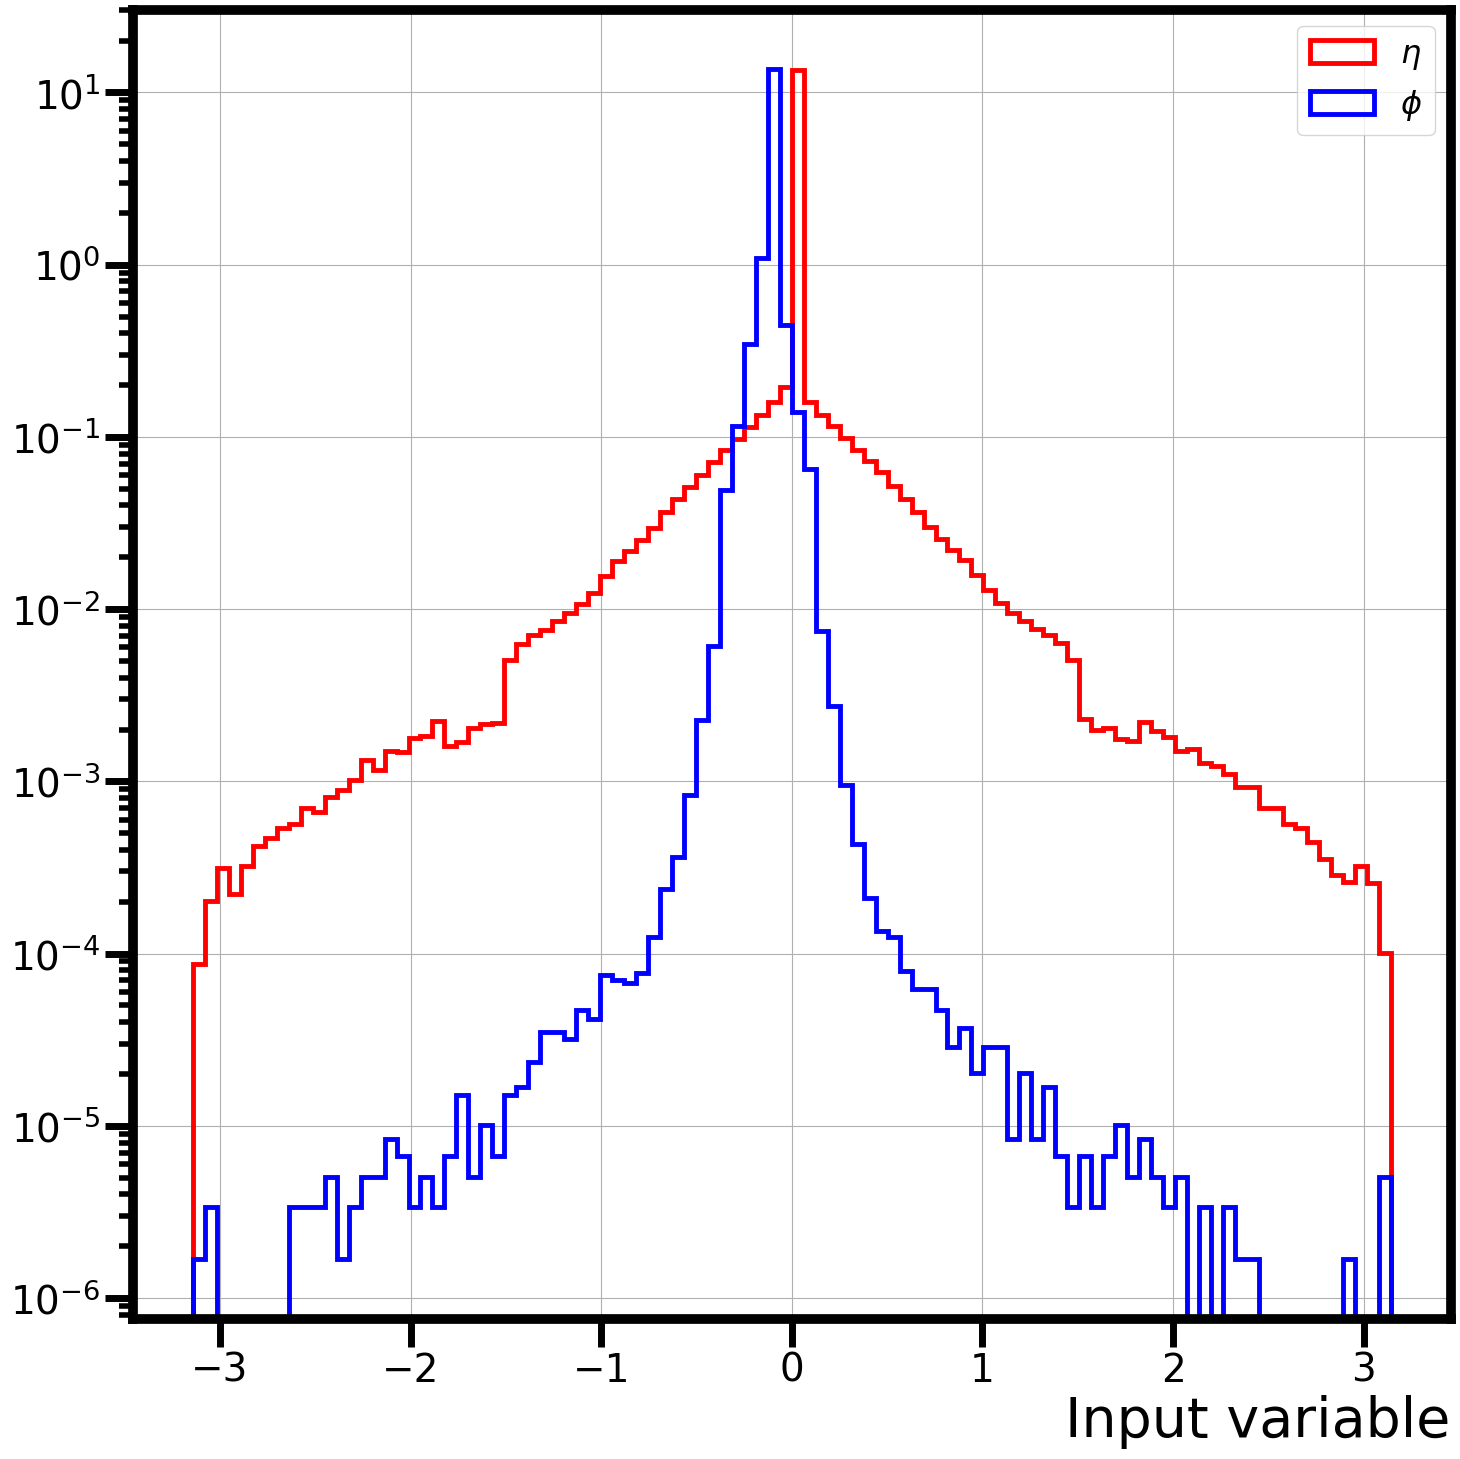

In [7]:
data_frame = QCD_data_set.data_frame.sample(frac=1)
QAE_model.fit(QCD_data_set.data_frame,QCD_data_set.training_columns)


Save it so we can use it later

In [ ]:
QAE_model.save()

Model saved to output/tree/model/saved_model/


Plot the loss to see how it trained

In [ ]:
QAE_model.plot_loss()

Not implemented for tree based methods


In [ ]:
from plot import style
from plot.basic import error_residual, plot_histo, rates,efficiency
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

minbias = DataSet.fromH5('dataset/Minbias')
minbias_test = minbias.data_frame.sample(frac=0.001)
minbias_outputs = QAE_model.predict(minbias_test,minbias.training_columns)
minbias_rates = rates(type(QAE_model).__name__,'minbias',minbias_outputs)
    
output_dict = {"Minbias" : {}, "HH4b" : {}, "QCD" : {}}
    
for datasets in output_dict.keys():
    data_test = DataSet.fromH5('dataset/'+datasets)
    test = data_test.data_frame.sample(frac=0.001)
    model_outputs = QAE_model.predict(test,data_test.training_columns)
    efficiency_out = efficiency(type(QAE_model).__name__,datasets,model_outputs)
    output_dict[datasets] = {'predictions' : model_outputs,'efficiencies' : efficiency_out,'dataset':data_test}

        
target_background = np.zeros(output_dict['Minbias']['predictions'].shape[0])
fig, ax = plt.subplots(1, 1, figsize=style.FIGURE_SIZE)
for i,datasets in enumerate(output_dict.keys()):
    trueVal = np.concatenate((np.ones(output_dict[datasets]['predictions'].shape[0]), target_background)) # anomaly=1, bkg=0
    predVal_loss = np.concatenate((output_dict[datasets]['predictions'], output_dict['Minbias']['predictions']))

    fpr_loss, tpr_loss, threshold_loss = roc_curve(trueVal, predVal_loss)

    auc_loss = auc(fpr_loss, tpr_loss)
                
    plt.plot(fpr_loss, tpr_loss, "-", label=datasets+' (auc = %.1f%%)'%(auc_loss*100.), color = style.colours[i])
            
ax.semilogx()
ax.semilogy()
ax.set_ylabel("True Positive Rate")
ax.set_xlabel("False Positive Rate")
ax.legend(loc='center right')
ax.grid(True)
ax.plot(np.linspace(0, 1),np.linspace(0, 1), '--', color='0.75')
ax.axvline(0.00001, color='green', linestyle='dashed', linewidth=2) # threshold value for measuring anomaly detection efficiency
plt.show()
    

        
plot_histo([output_dict[dataset]['predictions'] for dataset in output_dict.keys()], 
               [dataset for dataset in output_dict.keys()], 
               '', 
               'AnomalyScore', 
               'a.u.', 
               log = 'linear', 
               x_range=(0, 1), 
               bins = 50)
plt.show()
  
fig, ax = plt.subplots(1, 1, figsize=style.FIGURE_SIZE)
for i,sample_name in enumerate(output_dict.keys()):
    ax.plot(minbias_rates,output_dict[sample_name]['efficiencies'], label=sample_name, linewidth=style.LINEWIDTH,color = style.colours[i])
ax.grid(True)
ax.set_ylabel('Signal Efficiency')
ax.set_xlabel('Background Rate')
ax.legend(loc='upper right')
ax.set_xlim(0.0001,1)
ax.set_ylim(0.0001,10)
ax.set_xscale("log")
ax.set_yscale("log")

plt.show()